In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Customer.csv')

In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
dataset.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

<AxesSubplot:>

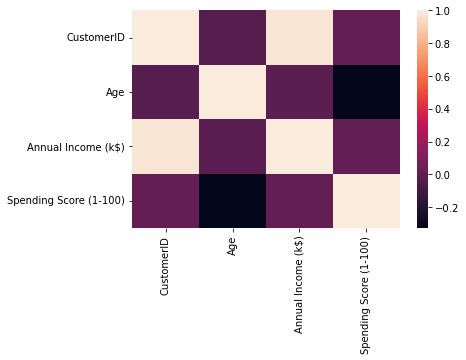

In [7]:
sns.heatmap(dataset.corr())

In [8]:
X = dataset.iloc[:, [3, 4]].values

In [9]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

### KMean

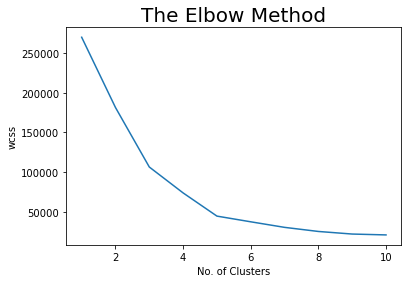

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

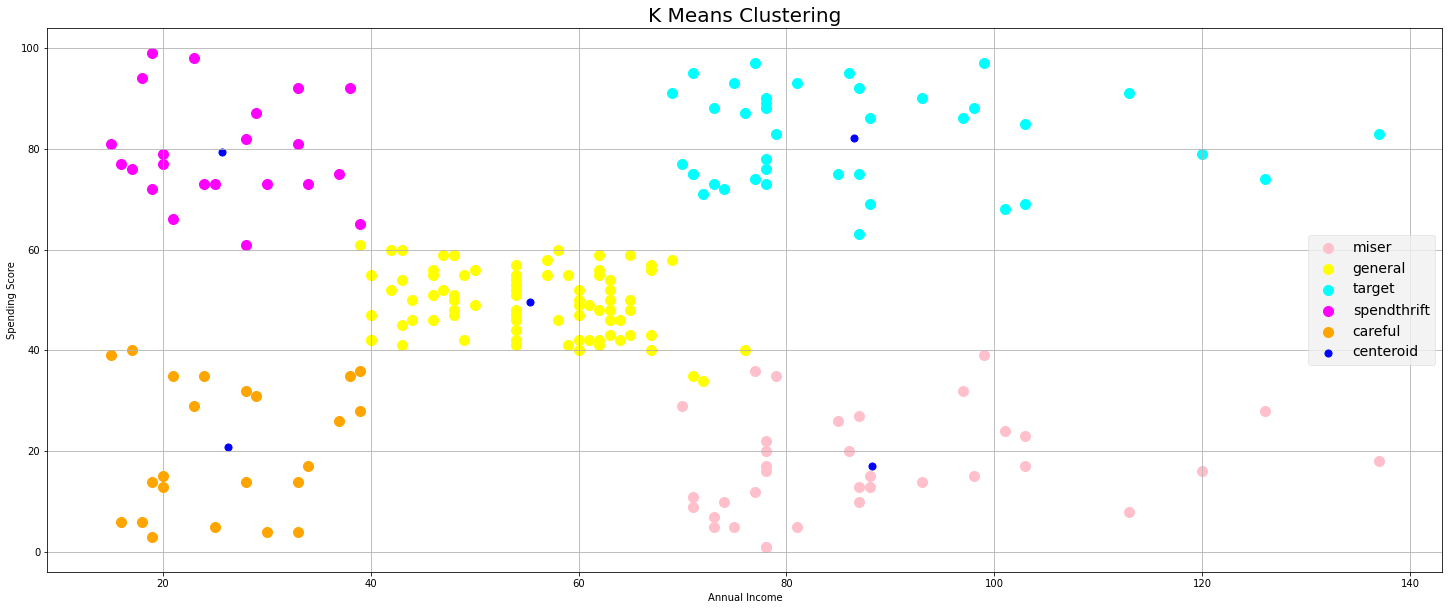

In [11]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

fig = plt.figure(figsize=(25, 10))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Hierarchy

No handles with labels found to put in legend.


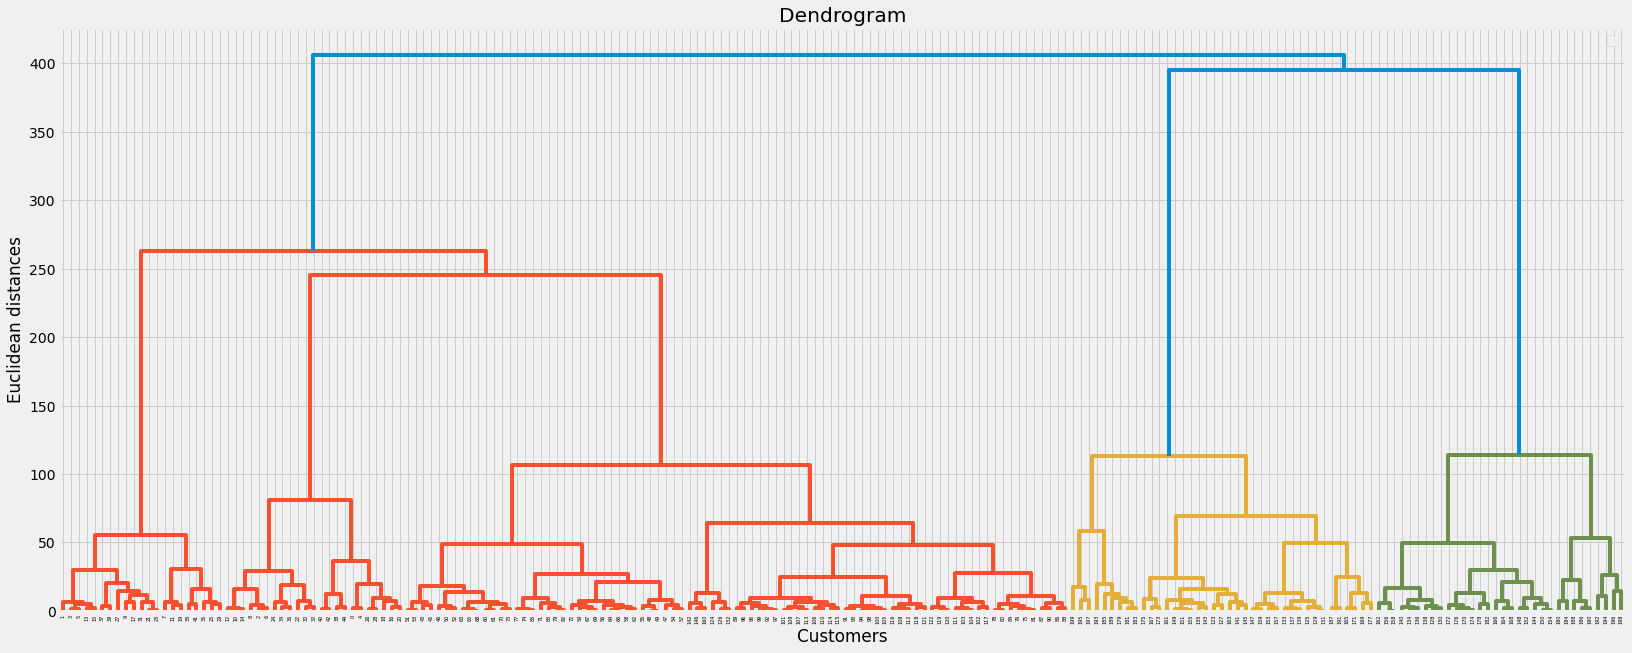

In [12]:
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(25, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.legend()
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

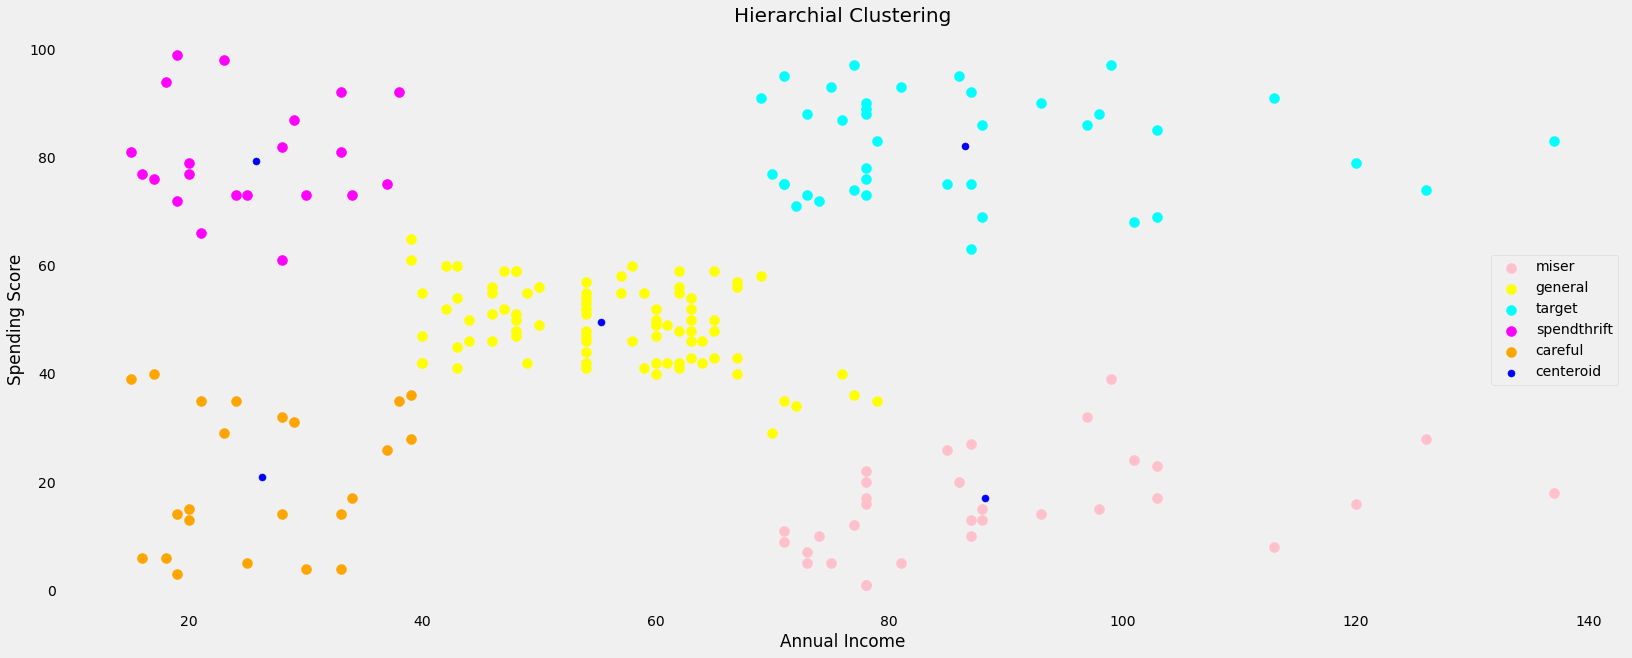

In [14]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [17]:
from sklearn.metrics import silhouette_score
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

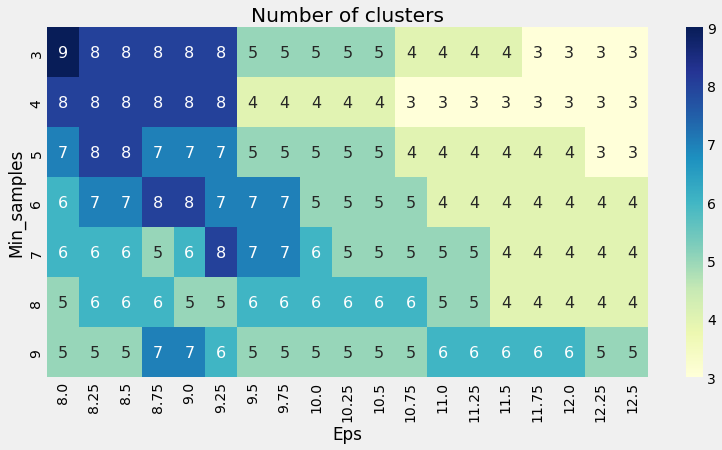

In [18]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

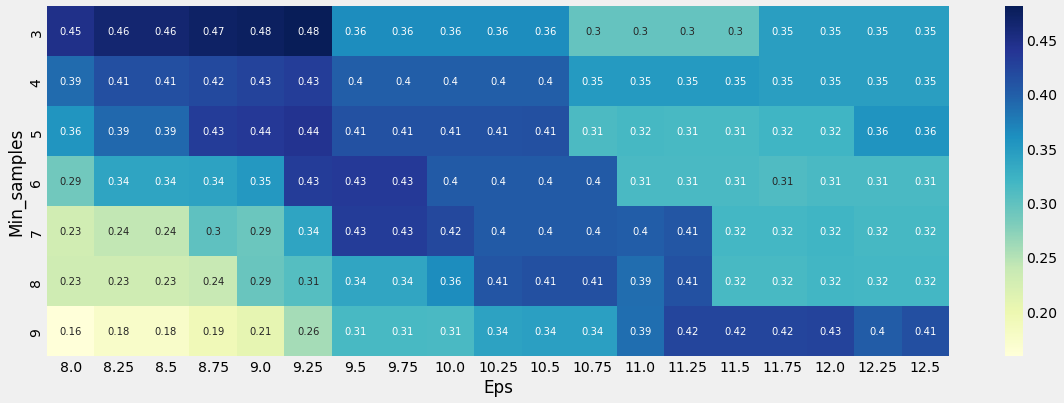

In [19]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [20]:
X = dataset.iloc[:, [3, 4]].values
DBS_clustering = DBSCAN(eps=10, min_samples=7).fit(X)
XDF = dataset
DBSCAN_clustered = XDF.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ 

In [21]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,23
0,12
1,16
2,95
3,31
4,23


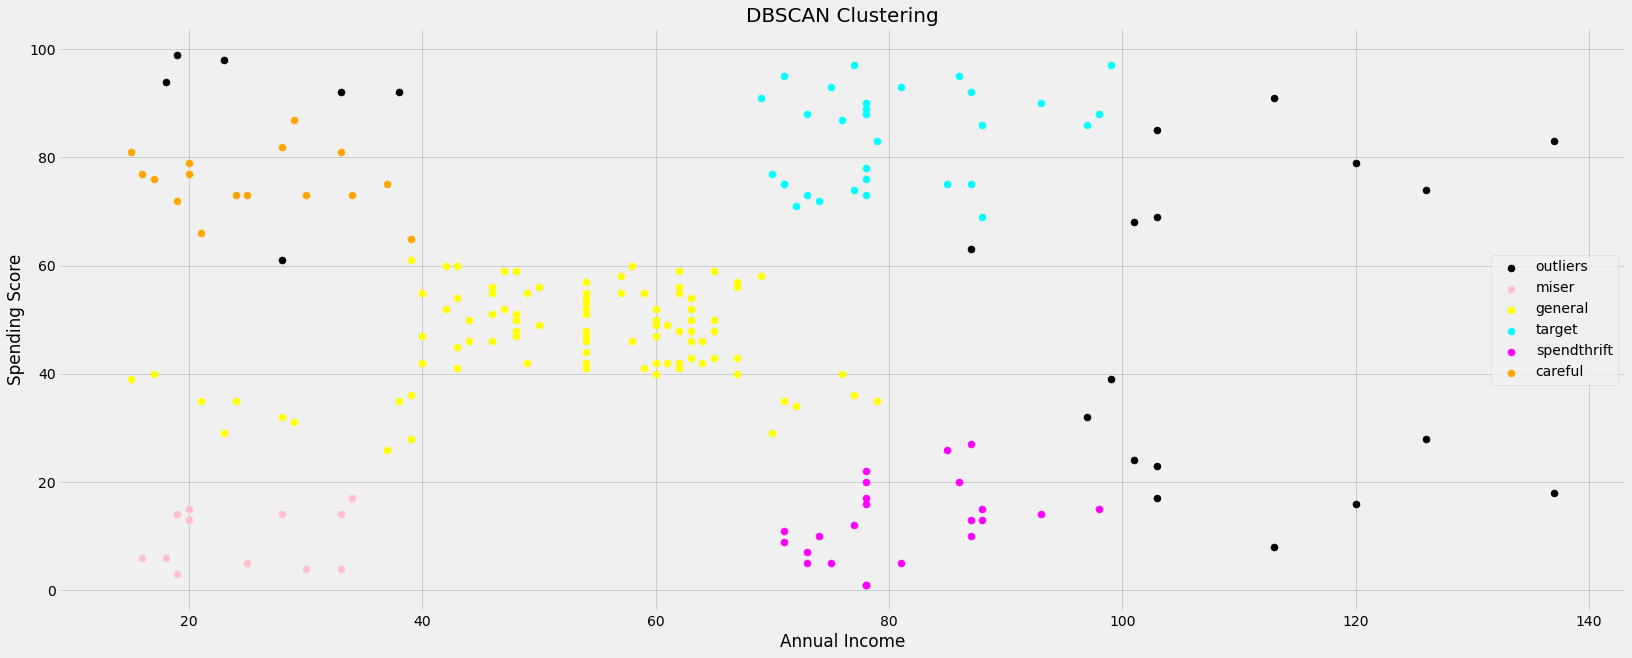

In [22]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
miser = DBSCAN_clustered[DBSCAN_clustered['Cluster']==0]
careful = DBSCAN_clustered[DBSCAN_clustered['Cluster']==1]
general = DBSCAN_clustered[DBSCAN_clustered['Cluster']==2]
target = DBSCAN_clustered[DBSCAN_clustered['Cluster']==3]
spendthrift = DBSCAN_clustered[DBSCAN_clustered['Cluster']==4]

fig, axes = plt.subplots(figsize=(25,10))

                
axes.scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=50, label='outliers', c="black")
axes.scatter(miser['Annual Income (k$)'], miser['Spending Score (1-100)'], s=50, label='miser', c="pink")
axes.scatter(general['Annual Income (k$)'], general['Spending Score (1-100)'], s=50, label='general', c="yellow")
axes.scatter(target['Annual Income (k$)'], target['Spending Score (1-100)'], s=50, label='target', c="cyan")
axes.scatter(spendthrift['Annual Income (k$)'], spendthrift['Spending Score (1-100)'], s=50, label='spendthrift', c="magenta")
axes.scatter(careful['Annual Income (k$)'], careful['Spending Score (1-100)'], s=50, label='careful', c="orange")
axes.set_title('DBSCAN Clustering', fontsize = 20)
axes.set_xlabel('Annual Income')
axes.set_ylabel('Spending Score')
axes.legend()

plt.show()